In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# **8:2**

In [27]:
df = pd.read_csv("Eth.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1915,3840.256348
1916,3763.196533
1917,3746.849609
1918,3760.026611


In [28]:
# Chia tập dữ liệu thành train, test
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1536
Test data size: 384


In [29]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [31]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing RMSE: 894.2187817329642
Testing MAPE: 41.53622439315356
Testing MAE: 809.4936853770593


Predicted Close Prices for the next 30 days:
[3381.0001326  3382.72642057 3384.45270854 3386.17899652 3387.90528449
 3389.63157246 3391.35786044 3393.08414841 3394.81043638 3396.53672436
 3398.26301233 3399.9893003  3401.71558828 3403.44187625 3405.16816422
 3406.8944522  3408.62074017 3410.34702814 3412.07331612 3413.79960409
 3415.52589206 3417.25218003 3418.97846801 3420.70475598 3422.43104395
 3424.15733193 3425.8836199  3427.60990787 3429.33619585 3431.06248382]


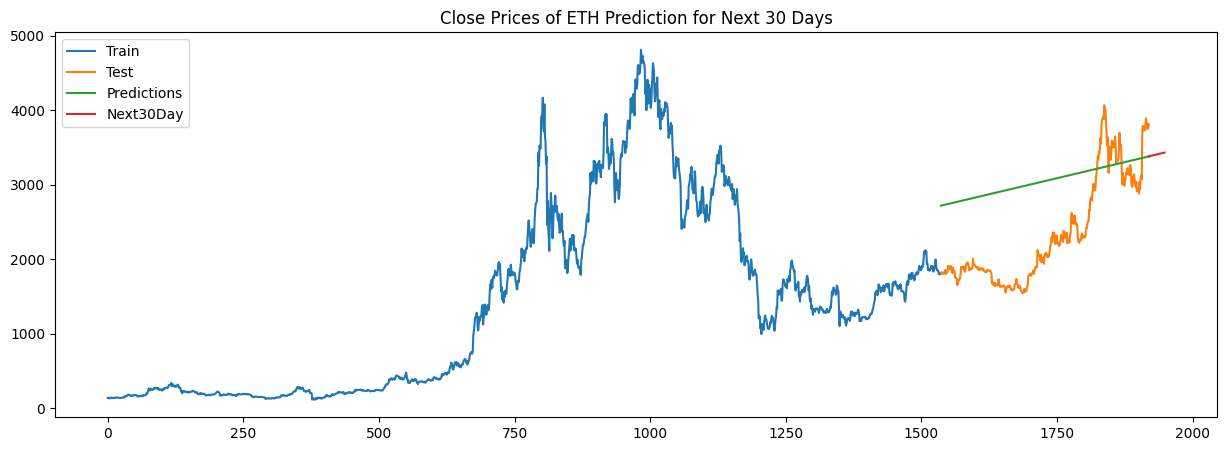

In [32]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted Close Prices for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30Day'])
plt.title(f'Close Prices of ETH Prediction for Next 30 Days')
plt.show()

Predicted closing prices for the next 60 days:
[3381.0001326  3382.72642057 3384.45270854 3386.17899652 3387.90528449
 3389.63157246 3391.35786044 3393.08414841 3394.81043638 3396.53672436
 3398.26301233 3399.9893003  3401.71558828 3403.44187625 3405.16816422
 3406.8944522  3408.62074017 3410.34702814 3412.07331612 3413.79960409
 3415.52589206 3417.25218003 3418.97846801 3420.70475598 3422.43104395
 3424.15733193 3425.8836199  3427.60990787 3429.33619585 3431.06248382
 3432.78877179 3434.51505977 3436.24134774 3437.96763571 3439.69392369
 3441.42021166 3443.14649963 3444.87278761 3446.59907558 3448.32536355
 3450.05165153 3451.7779395  3453.50422747 3455.23051545 3456.95680342
 3458.68309139 3460.40937936 3462.13566734 3463.86195531 3465.58824328
 3467.31453126 3469.04081923 3470.7671072  3472.49339518 3474.21968315
 3475.94597112 3477.6722591  3479.39854707 3481.12483504 3482.85112302]


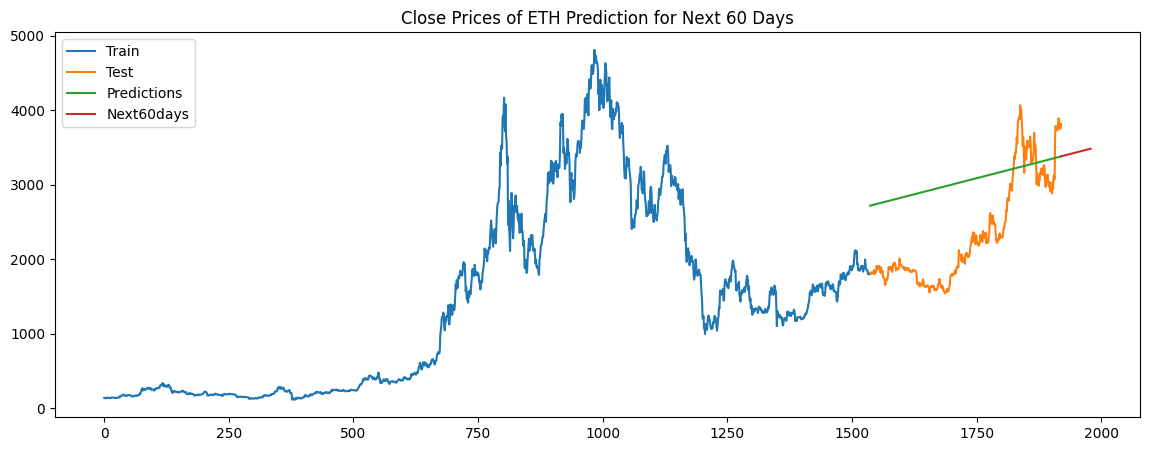

In [33]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Tạo mảng 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Dự đoán
y_next_60_days = model.predict(x_next_60_days)

# In ra dự đoán giá trong 60 ngày tiếp theo
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions','Next60days'])
plt.title(f'Close Prices of ETH Prediction for Next 60 Days')
plt.show()

Predicted closing prices for the next 90 days:
[3381.0001326  3382.72642057 3384.45270854 3386.17899652 3387.90528449
 3389.63157246 3391.35786044 3393.08414841 3394.81043638 3396.53672436
 3398.26301233 3399.9893003  3401.71558828 3403.44187625 3405.16816422
 3406.8944522  3408.62074017 3410.34702814 3412.07331612 3413.79960409
 3415.52589206 3417.25218003 3418.97846801 3420.70475598 3422.43104395
 3424.15733193 3425.8836199  3427.60990787 3429.33619585 3431.06248382
 3432.78877179 3434.51505977 3436.24134774 3437.96763571 3439.69392369
 3441.42021166 3443.14649963 3444.87278761 3446.59907558 3448.32536355
 3450.05165153 3451.7779395  3453.50422747 3455.23051545 3456.95680342
 3458.68309139 3460.40937936 3462.13566734 3463.86195531 3465.58824328
 3467.31453126 3469.04081923 3470.7671072  3472.49339518 3474.21968315
 3475.94597112 3477.6722591  3479.39854707 3481.12483504 3482.85112302
 3484.57741099 3486.30369896 3488.02998694 3489.75627491 3491.48256288
 3493.20885086 3494.93513883 3

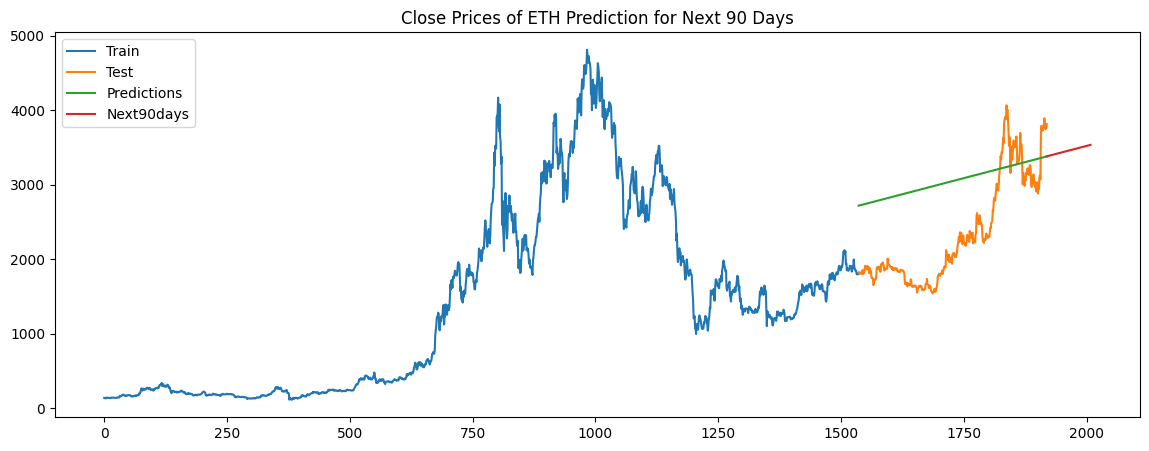

In [34]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo mảng 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_90_days = model.predict(x_next_90_days)

# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test','Predictions','Next90days'])
plt.title(f'Close Prices of ETH Prediction for Next 90 Days')
plt.show()

# **7:3**

In [35]:
df = pd.read_csv("Eth.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1915,3840.256348
1916,3763.196533
1917,3746.849609
1918,3760.026611


In [36]:
# Chia tập dữ liệu thành train, test
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1344
Test data size: 576


In [37]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [39]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing RMSE: 1685.4824879676391
Testing MAPE: 90.80911342727612
Testing MAE: 1634.5558680888369


Predicted Close Prices for the next 30 days:
[4418.20887643 4420.65220184 4423.09552726 4425.53885267 4427.98217809
 4430.4255035  4432.86882892 4435.31215433 4437.75547974 4440.19880516
 4442.64213057 4445.08545599 4447.5287814  4449.97210682 4452.41543223
 4454.85875764 4457.30208306 4459.74540847 4462.18873389 4464.6320593
 4467.07538472 4469.51871013 4471.96203555 4474.40536096 4476.84868637
 4479.29201179 4481.7353372  4484.17866262 4486.62198803 4489.06531345]


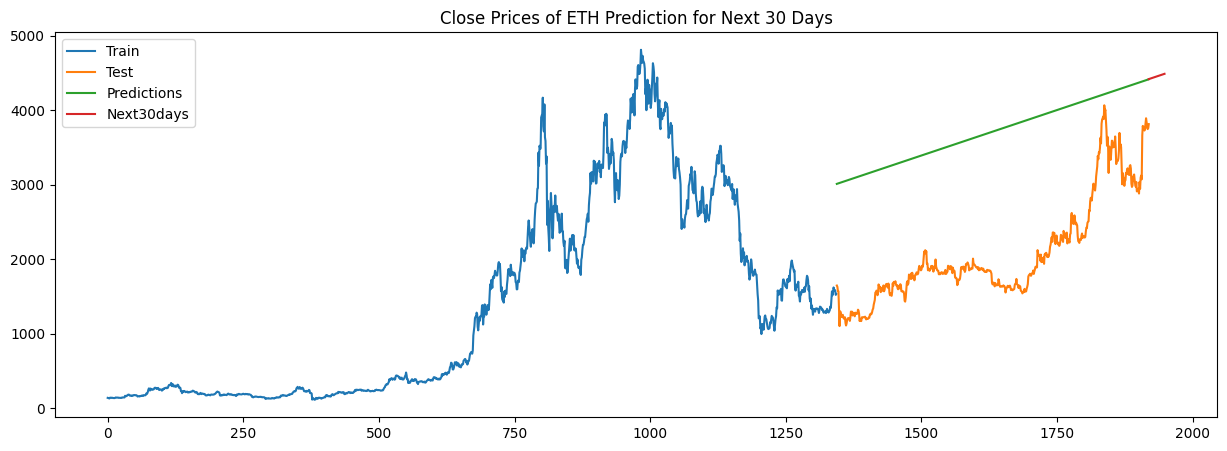

In [40]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted Close Prices for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30days'])
plt.title(f'Close Prices of ETH Prediction for Next 30 Days')
plt.show()

Predicted closing prices for the next 60 days:
[4418.20887643 4420.65220184 4423.09552726 4425.53885267 4427.98217809
 4430.4255035  4432.86882892 4435.31215433 4437.75547974 4440.19880516
 4442.64213057 4445.08545599 4447.5287814  4449.97210682 4452.41543223
 4454.85875764 4457.30208306 4459.74540847 4462.18873389 4464.6320593
 4467.07538472 4469.51871013 4471.96203555 4474.40536096 4476.84868637
 4479.29201179 4481.7353372  4484.17866262 4486.62198803 4489.06531345
 4491.50863886 4493.95196427 4496.39528969 4498.8386151  4501.28194052
 4503.72526593 4506.16859135 4508.61191676 4511.05524218 4513.49856759
 4515.941893   4518.38521842 4520.82854383 4523.27186925 4525.71519466
 4528.15852008 4530.60184549 4533.0451709  4535.48849632 4537.93182173
 4540.37514715 4542.81847256 4545.26179798 4547.70512339 4550.14844881
 4552.59177422 4555.03509963 4557.47842505 4559.92175046 4562.36507588]


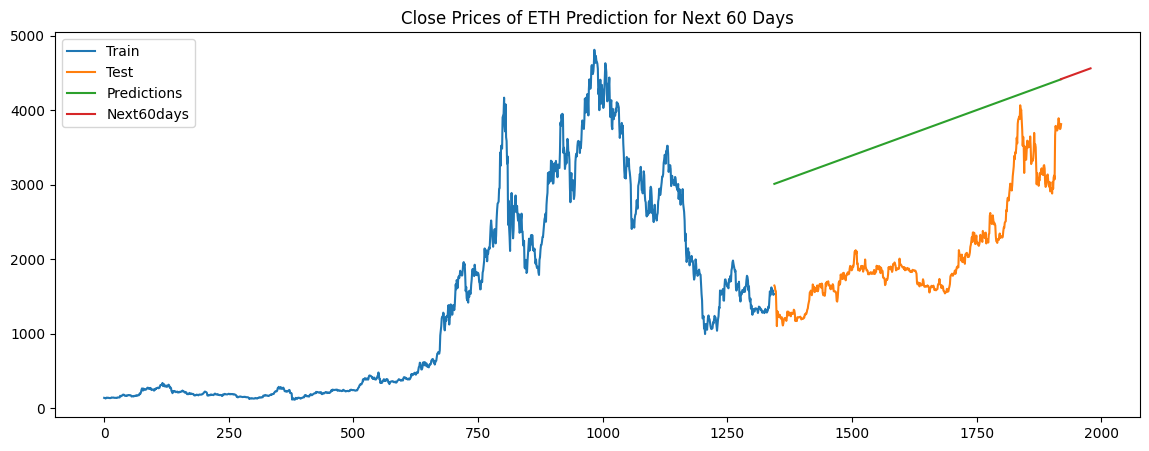

In [41]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Tạo mảng 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Dự đoán
y_next_60_days = model.predict(x_next_60_days)

# In ra dự đoán giá trong 60 ngày tiếp theo
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions','Next60days'])
plt.title(f'Close Prices of ETH Prediction for Next 60 Days')
plt.show()

Predicted closing prices for the next 90 days:
[4418.20887643 4420.65220184 4423.09552726 4425.53885267 4427.98217809
 4430.4255035  4432.86882892 4435.31215433 4437.75547974 4440.19880516
 4442.64213057 4445.08545599 4447.5287814  4449.97210682 4452.41543223
 4454.85875764 4457.30208306 4459.74540847 4462.18873389 4464.6320593
 4467.07538472 4469.51871013 4471.96203555 4474.40536096 4476.84868637
 4479.29201179 4481.7353372  4484.17866262 4486.62198803 4489.06531345
 4491.50863886 4493.95196427 4496.39528969 4498.8386151  4501.28194052
 4503.72526593 4506.16859135 4508.61191676 4511.05524218 4513.49856759
 4515.941893   4518.38521842 4520.82854383 4523.27186925 4525.71519466
 4528.15852008 4530.60184549 4533.0451709  4535.48849632 4537.93182173
 4540.37514715 4542.81847256 4545.26179798 4547.70512339 4550.14844881
 4552.59177422 4555.03509963 4557.47842505 4559.92175046 4562.36507588
 4564.80840129 4567.25172671 4569.69505212 4572.13837753 4574.58170295
 4577.02502836 4579.46835378 45

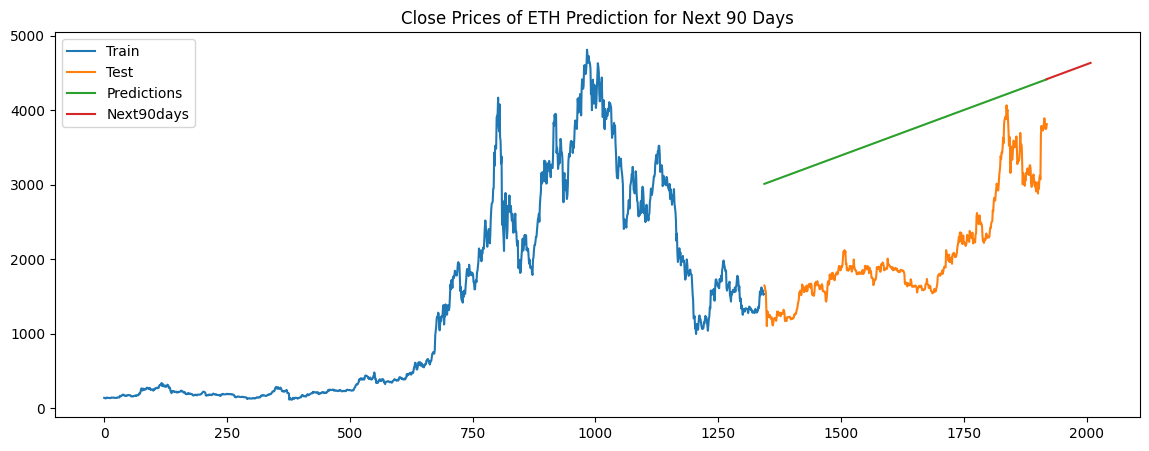

In [42]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo mảng 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_90_days = model.predict(x_next_90_days)

# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test','Predictions','Next90days'])
plt.title(f'Close Prices of ETH Prediction for Next 90 Days')
plt.show()

# **6:4**

In [43]:
df = pd.read_csv("Eth.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1915,3840.256348
1916,3763.196533
1917,3746.849609
1918,3760.026611


In [44]:
# Chia tập dữ liệu thành train, test
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1152
Test data size: 768


In [45]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [47]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing RMSE: 2926.7998280363004
Testing MAPE: 161.55837333322972
Testing MAE: 2867.543921940425


Predicted Close Prices for the next 30 days:
[6233.20904316 6236.85835437 6240.50766558 6244.15697679 6247.806288
 6251.45559921 6255.10491043 6258.75422164 6262.40353285 6266.05284406
 6269.70215527 6273.35146648 6277.0007777  6280.65008891 6284.29940012
 6287.94871133 6291.59802254 6295.24733376 6298.89664497 6302.54595618
 6306.19526739 6309.8445786  6313.49388981 6317.14320103 6320.79251224
 6324.44182345 6328.09113466 6331.74044587 6335.38975708 6339.0390683 ]


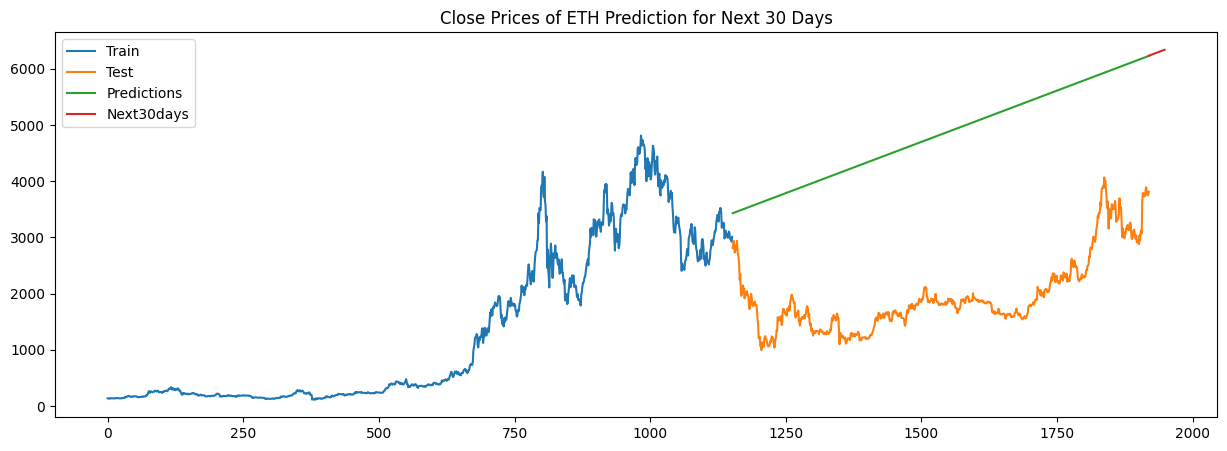

In [48]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted Close Prices for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30days'])
plt.title(f'Close Prices of ETH Prediction for Next 30 Days')
plt.show()

Predicted closing prices for the next 60 days:
[6233.20904316 6236.85835437 6240.50766558 6244.15697679 6247.806288
 6251.45559921 6255.10491043 6258.75422164 6262.40353285 6266.05284406
 6269.70215527 6273.35146648 6277.0007777  6280.65008891 6284.29940012
 6287.94871133 6291.59802254 6295.24733376 6298.89664497 6302.54595618
 6306.19526739 6309.8445786  6313.49388981 6317.14320103 6320.79251224
 6324.44182345 6328.09113466 6331.74044587 6335.38975708 6339.0390683
 6342.68837951 6346.33769072 6349.98700193 6353.63631314 6357.28562435
 6360.93493557 6364.58424678 6368.23355799 6371.8828692  6375.53218041
 6379.18149163 6382.83080284 6386.48011405 6390.12942526 6393.77873647
 6397.42804768 6401.0773589  6404.72667011 6408.37598132 6412.02529253
 6415.67460374 6419.32391495 6422.97322617 6426.62253738 6430.27184859
 6433.9211598  6437.57047101 6441.21978222 6444.86909344 6448.51840465]


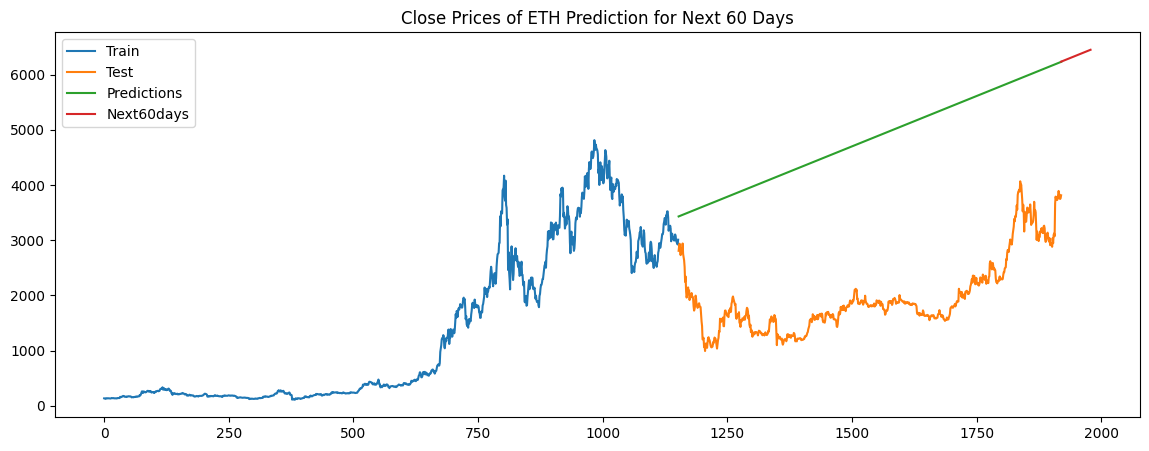

In [49]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Tạo mảng 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Dự đoán
y_next_60_days = model.predict(x_next_60_days)

# In ra dự đoán giá trong 60 ngày tiếp theo
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions','Next60days'])
plt.title(f'Close Prices of ETH Prediction for Next 60 Days')
plt.show()

Predicted closing prices for the next 90 days:
[6233.20904316 6236.85835437 6240.50766558 6244.15697679 6247.806288
 6251.45559921 6255.10491043 6258.75422164 6262.40353285 6266.05284406
 6269.70215527 6273.35146648 6277.0007777  6280.65008891 6284.29940012
 6287.94871133 6291.59802254 6295.24733376 6298.89664497 6302.54595618
 6306.19526739 6309.8445786  6313.49388981 6317.14320103 6320.79251224
 6324.44182345 6328.09113466 6331.74044587 6335.38975708 6339.0390683
 6342.68837951 6346.33769072 6349.98700193 6353.63631314 6357.28562435
 6360.93493557 6364.58424678 6368.23355799 6371.8828692  6375.53218041
 6379.18149163 6382.83080284 6386.48011405 6390.12942526 6393.77873647
 6397.42804768 6401.0773589  6404.72667011 6408.37598132 6412.02529253
 6415.67460374 6419.32391495 6422.97322617 6426.62253738 6430.27184859
 6433.9211598  6437.57047101 6441.21978222 6444.86909344 6448.51840465
 6452.16771586 6455.81702707 6459.46633828 6463.1156495  6466.76496071
 6470.41427192 6474.06358313 6477

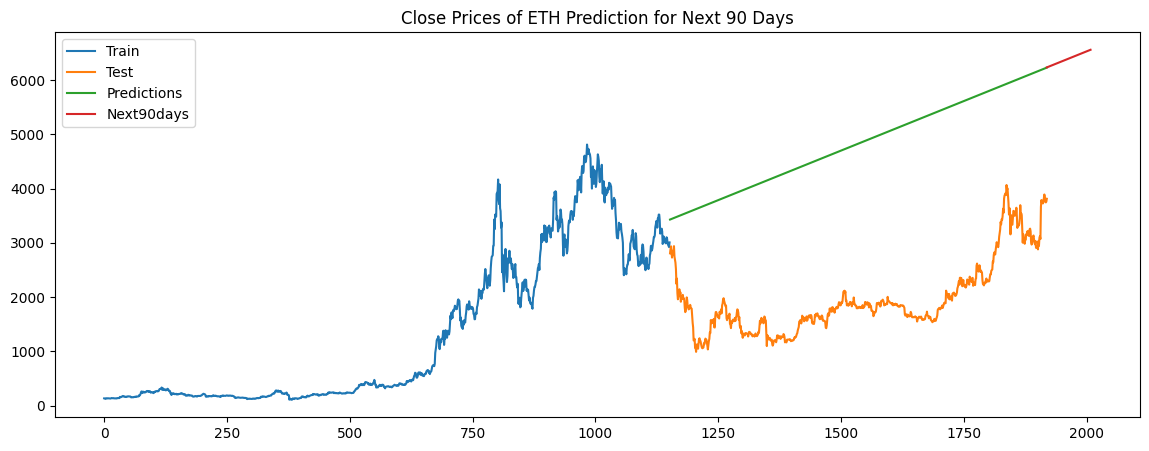

In [50]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo mảng 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán
y_next_90_days = model.predict(x_next_90_days)

# In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(14, 5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test','Predictions','Next90days'])
plt.title(f'Close Prices of ETH Prediction for Next 90 Days')
plt.show()